# Convolution Network

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

## Some helper functions

In [14]:
def unpickle(file):
    fo = open(file, 'rb')
    data = pickle.load(fo, encoding='latin1')
    fo.close
    return data


def clean(data):
    # We need to fix shape
    imgs = data.reshape(data.shape[0], 3, 32, 32).astype(np.float32)
    # Naive grayscala conversion
    grayscala_imgs = imgs.mean(1)
    # For faster processing we only need 24x24 images
    cropped_imgs = grayscala_imgs[:, 4:28, 4:28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis=1)
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis=1)
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0 / np.sqrt(img_size))
    normalized = (img_data - meansT) / adj_stds
    return normalized
    
    
def load_images(path):
    names = unpickle(path + 'batches.meta')['label_names']
    data, labels = [], []
    for i in range(1, 6):
        filename = path + 'data_batch_' + str(i)
        batch_data = unpickle(filename)
        if len(data) > 0:
            data = np.vstack([data, batch_data['data']])
            labels = np.hstack([labels, batch_data['labels']])
        else:
            data = batch_data['data']
            labels = batch_data['labels']
    data = clean(data)
    return names, data, labels

## Load and show some images

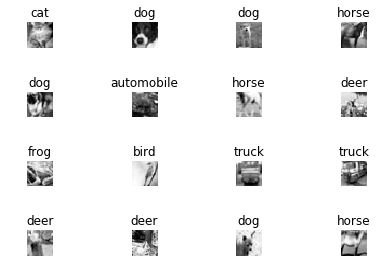

In [22]:
names, data, labels = load_images('../datasets/cifar-10-batches-py/')
plt.figure()
rows, cols = 4, 4
random_idxs = random.sample(range(len(data)), rows * cols)
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    j = random_idxs[i]
    plt.title(names[labels[j]])
    img = np.reshape(data[j, :], (24, 24))
    plt.imshow(img, cmap='Greys_r')
    plt.axis('off')
plt.tight_layout()
plt.show()